## Visualizations for my presentation

Practically all of this code was generated by ChatGPT

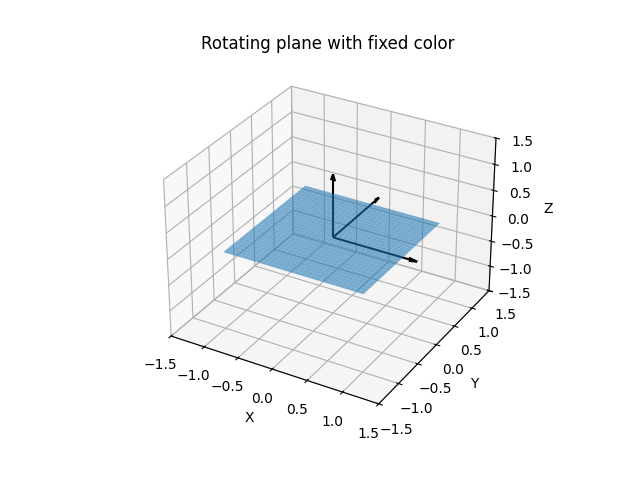

In [1]:
%matplotlib notebook
%matplotlib ipympl

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# --- Helper: Rodrigues’ rotation formula ---
def rotation_matrix(axis, theta):
    axis = axis / np.linalg.norm(axis)
    a = np.cos(theta / 2.0)
    b, c, d = -axis * np.sin(theta / 2.0)
    aa, bb, cc, dd = a*a, b*b, c*c, d*d
    bc, ad, ac, ab, bd, cd = b*c, a*d, a*c, a*b, b*d, c*d

    return np.array([
        [aa + bb - cc - dd,     2*(bc + ad),         2*(bd - ac)],
        [2*(bc - ad),           aa + cc - bb - dd,   2*(cd + ab)],
        [2*(bd + ac),           2*(cd - ab),         aa + dd - bb - cc]
    ])

# --- Plane grid on xy-plane (z = 0) ---
grid_size = 30
x = np.linspace(-1, 1, grid_size)
y = np.linspace(-1, 1, grid_size)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)

# Flatten for rotation: shape (N, 3)
points_base = np.stack([X.ravel(), Y.ravel(), Z.ravel()], axis=1)

# --- Define initial and final plane orientation ---
n_initial = np.array([0.0, 0.0, 1.0])         # xy-plane normal
n_final = np.array([1.0, 1.0, 1.0])           # target plane normal
n_final /= np.linalg.norm(n_final)

axis = np.cross(n_initial, n_final)
if np.linalg.norm(axis) < 1e-8:
    axis = np.array([1.0, 0.0, 0.0])          # fallback axis if parallel
else:
    axis /= np.linalg.norm(axis)

theta_total = np.arccos(np.clip(np.dot(n_initial, n_final), -1.0, 1.0))

# Translate the plane upwards a bit
translation_final = np.array([0.0, 0.0, 1.0])

# --- Figure setup ---
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_zlim(-1.5, 1.5)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Rotating plane with fixed color")

# Draw coordinate axes
ax.quiver(0, 0, 0, 1.2, 0, 0, color="k", arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, 0, 1.2, 0, color="k", arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, 0, 0, 1.2, color="k", arrow_length_ratio=0.1)

# --- Initial plane (solid fixed color, no shading) ---
plane = [
    ax.plot_surface(
        X, Y, Z,
        color="tab:blue",
        alpha=0.6,
        shade=False   # <- keeps appearance constant as it moves
    )
]

n_frames = 120

def update(frame):
    t = frame / (n_frames - 1)        # goes 0 -> 1
    theta = t * theta_total
    R = rotation_matrix(axis, theta)
    translation = t * translation_final

    pts = points_base @ R.T + translation
    X_t = pts[:, 0].reshape(X.shape)
    Y_t = pts[:, 1].reshape(Y.shape)
    Z_t = pts[:, 2].reshape(Z.shape)

    # Replace the old surface with the new one, same color & shading settings
    plane[0].remove()
    plane[0] = ax.plot_surface(
        X_t, Y_t, Z_t,
        color="tab:blue",
        alpha=0.6,
        shade=False
    )
    return plane

anim = FuncAnimation(fig, update, frames=n_frames, interval=50, blit=False)
plt.show()


/Users/Trym/Desktop/NTNU/DataTek/Second_Year/Fall/TDT15/generative_uncertainty/venv/lib/python3.13/site-packages/matplotlib/animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


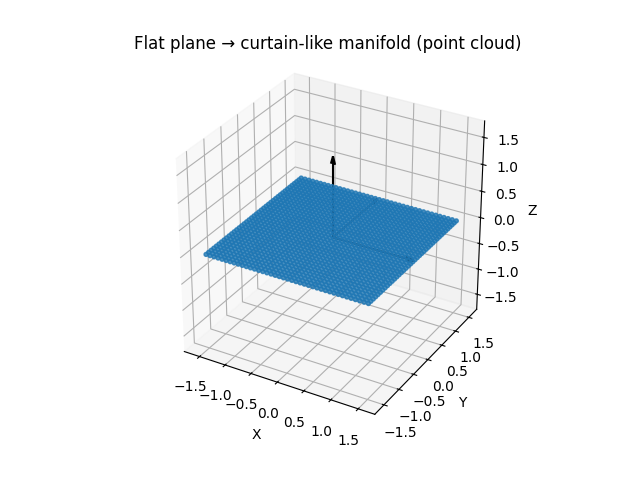

In [2]:
%matplotlib notebook
%matplotlib ipympl

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# --- Grid on the original flat plane (xy-plane, z = 0) ---
grid_size = 40
x = np.linspace(-1.5, 1.5, grid_size)
y = np.linspace(-1.5, 1.5, grid_size)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)

# Flatten to (N, 3)
points_base = np.stack([X.ravel(), Y.ravel(), Z.ravel()], axis=1)

# Curtain parameters
fold_amplitude   = 0.8    # how deep the folds are in z
fold_frequency   = 3.0    # number of waves across y
squeeze_strength = 0.3    # how much we "pinch" in x

def curtain_deformation(points, t):
    """
    Deform a flat plane into a curtain-like manifold.

    points : (N, 3), with z initially = 0
    t      : interpolation parameter in [0, 1]
    """
    x = points[:, 0]
    y = points[:, 1]
    z = points[:, 2]

    # Wavy displacement in z
    z_new = z + t * fold_amplitude * np.sin(fold_frequency * y)

    # Slight squeeze in x so folds look more curtain-like
    x_new = x - t * squeeze_strength * np.sin(fold_frequency * y)

    # y stays as is
    y_new = y

    return np.stack([x_new, y_new, z_new], axis=1)

# --- Figure / axes setup ---
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlim(-1.8, 1.8)
ax.set_ylim(-1.8, 1.8)
ax.set_zlim(-1.8, 1.8)
ax.set_box_aspect((1, 1, 1))  # avoid autoscaling distortion

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Flat plane → curtain-like manifold (point cloud)")

# Reference axes
ax.quiver(0, 0, 0, 1.5, 0,   0, color="k", arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, 0,   1.5, 0, color="k", arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, 0,   0,   1.5, color="k", arrow_length_ratio=0.1)

# Initial (flat) configuration
pts0 = curtain_deformation(points_base, t=0.0)
scat = ax.scatter(
    pts0[:, 0], pts0[:, 1], pts0[:, 2],
    s=8,
    c="tab:blue",
    alpha=0.8
)

n_frames = 150

def update(frame):
    t = frame / (n_frames - 1)  # 0 → 1
    pts = curtain_deformation(points_base, t)

    # Update scatter *in place* (no remove()/replot)
    scat._offsets3d = (pts[:, 0], pts[:, 1], pts[:, 2])

    return (scat,)

anim = FuncAnimation(fig, update, frames=n_frames, interval=50, blit=False)
plt.show()


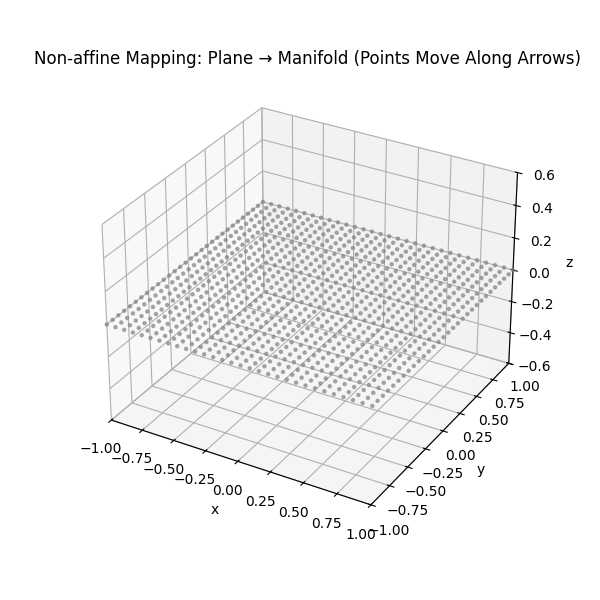

In [1]:
%matplotlib ipympl

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401
from matplotlib.animation import FuncAnimation

# -------------------------
# Geometry setup
# -------------------------

# Grid for plane/manifold
x = np.linspace(-1.0, 1.0, 30)
y = np.linspace(-1.0, 1.0, 30)
X, Y = np.meshgrid(x, y)

# Flat plane z = 0
Z_plane = np.zeros_like(X)
plane_x = X.ravel()
plane_y = Y.ravel()
plane_z = Z_plane.ravel()

# Weak "curtain-like" manifold
Z_manifold = 0.3 * np.sin(np.pi * X) * np.exp(-Y**2)
manifold_x = X.ravel()
manifold_y = Y.ravel()
manifold_z = Z_manifold.ravel()

# Three red points on the original plane (z = 0)
red_points_start = np.array([
    [-0.5, -0.3, 0.0],
    [ 0.0,  0.6, 0.0],
    [ 0.7, -0.1, 0.0],
])

# Choose three "random" mapped positions on the manifold
rng = np.random.default_rng(0)
indices = rng.choice(manifold_x.shape[0], size=3, replace=False)

green_points = np.stack([
    manifold_x[indices],
    manifold_y[indices],
    manifold_z[indices],
], axis=1)

# -------------------------
# Figure & artists
# -------------------------

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection="3d")

# Plane (initially visible)
plane_scatter = ax.scatter(
    plane_x, plane_y, plane_z,
    s=5, alpha=0.6, color="gray"
)

# Manifold (initially hidden)
manifold_scatter = ax.scatter(
    [], [], [],
    s=5, alpha=0.8, color="royalblue"
)

# Moving red points (initially hidden)
red_scatter = ax.scatter([], [], [], s=60, color="red")

# Static green target points on manifold (initially hidden)
green_scatter = ax.scatter([], [], [], s=60, color="limegreen")

# Arrow lines (we'll keep them fixed and just hide/show)
arrow_lines = []
for _ in range(3):
    line, = ax.plot([], [], [], "k-", linewidth=1.5)
    arrow_lines.append(line)

# Axes
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-0.6, 0.6)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("Non-affine Mapping: Plane → Manifold (Points Move Along Arrows)")

# -------------------------
# Animation timing
# -------------------------

frames_total         = 140

frame_red_appear     = 15   # Phase 1: red points appear on plane
frame_manifold_start = 35   # Plane disappears, manifold appears
frame_arrows_show    = 45   # Show green targets + arrows
frame_move_start     = 55   # Start moving red points along arrows
frame_move_end       = 105  # End movement (alpha = 1)
# After frame_move_end: Phase 3 (only manifold + green points)


def set_offsets(scatter, points_or_empty):
    """Helper to set 3D scatter offsets or hide it."""
    if points_or_empty is None or len(points_or_empty) == 0:
        scatter._offsets3d = ([], [], [])
    else:
        xs = points_or_empty[:, 0]
        ys = points_or_empty[:, 1]
        zs = points_or_empty[:, 2]
        scatter._offsets3d = (xs, ys, zs)


def hide_arrows():
    for line in arrow_lines:
        line.set_data([], [])
        line.set_3d_properties([])


def show_arrows():
    # Static segments from start red → target green
    for i, line in enumerate(arrow_lines):
        xs = [red_points_start[i, 0], green_points[i, 0]]
        ys = [red_points_start[i, 1], green_points[i, 1]]
        zs = [red_points_start[i, 2], green_points[i, 2]]
        line.set_data(xs, ys)
        line.set_3d_properties(zs)


def init():
    plane_scatter._offsets3d = (plane_x, plane_y, plane_z)
    manifold_scatter._offsets3d = ([], [], [])
    set_offsets(red_scatter, None)
    set_offsets(green_scatter, None)
    hide_arrows()
    return [plane_scatter, manifold_scatter, red_scatter, green_scatter, *arrow_lines]


def update(frame):
    # --- Phase 1a: Plane only ---
    if frame < frame_red_appear:
        plane_scatter._offsets3d = (plane_x, plane_y, plane_z)
        manifold_scatter._offsets3d = ([], [], [])
        set_offsets(red_scatter, None)
        set_offsets(green_scatter, None)
        hide_arrows()

    # --- Phase 1b: Plane + red points ---
    elif frame_red_appear <= frame < frame_manifold_start:
        plane_scatter._offsets3d = (plane_x, plane_y, plane_z)
        manifold_scatter._offsets3d = ([], [], [])
        set_offsets(red_scatter, red_points_start)
        set_offsets(green_scatter, None)
        hide_arrows()

    # --- Phase 2a: Manifold + red points (no arrows yet) ---
    elif frame_manifold_start <= frame < frame_arrows_show:
        plane_scatter._offsets3d = ([], [], [])
        manifold_scatter._offsets3d = (manifold_x, manifold_y, manifold_z)
        set_offsets(red_scatter, red_points_start)
        set_offsets(green_scatter, None)
        hide_arrows()

    # --- Phase 2b: Manifold + red + green + arrows (no movement yet) ---
    elif frame_arrows_show <= frame < frame_move_start:
        plane_scatter._offsets3d = ([], [], [])
        manifold_scatter._offsets3d = (manifold_x, manifold_y, manifold_z)
        set_offsets(red_scatter, red_points_start)
        set_offsets(green_scatter, green_points)
        show_arrows()

    # --- Phase 2c: Manifold + moving red points + green + arrows ---
    elif frame_move_start <= frame <= frame_move_end:
        plane_scatter._offsets3d = ([], [], [])
        manifold_scatter._offsets3d = (manifold_x, manifold_y, manifold_z)
        set_offsets(green_scatter, green_points)
        show_arrows()

        # Interpolation factor alpha in [0, 1]
        alpha = (frame - frame_move_start) / (frame_move_end - frame_move_start)
        alpha = np.clip(alpha, 0.0, 1.0)
        moving_points = (1 - alpha) * red_points_start + alpha * green_points
        set_offsets(red_scatter, moving_points)

    # --- Phase 3: Final manifold + green points only ---
    else:
        plane_scatter._offsets3d = ([], [], [])
        manifold_scatter._offsets3d = (manifold_x, manifold_y, manifold_z)
        set_offsets(red_scatter, None)
        set_offsets(green_scatter, green_points)
        hide_arrows()

    artists = [plane_scatter, manifold_scatter, red_scatter, green_scatter, *arrow_lines]
    return artists


ani = FuncAnimation(
    fig,
    update,
    init_func=init,
    frames=frames_total,
    interval=100,  # ms per frame; lower = smoother/faster
    blit=False     # keep False for 3D stability
)

plt.show()


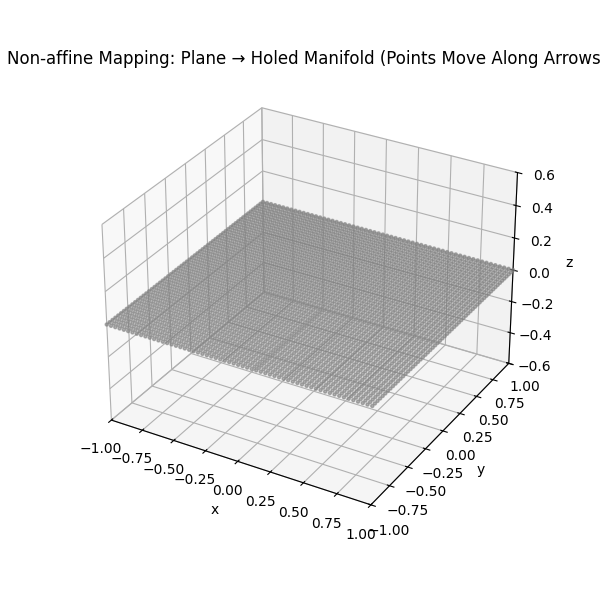

In [1]:
%matplotlib ipympl

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401
from matplotlib.animation import FuncAnimation

# -------------------------
# Geometry setup
# -------------------------

# Denser grid for plane/manifold
x = np.linspace(-1.0, 1.0, 60)
y = np.linspace(-1.0, 1.0, 60)
X, Y = np.meshgrid(x, y)

# Flat plane z = 0
Z_plane = np.zeros_like(X)
plane_x = X.ravel()
plane_y = Y.ravel()
plane_z = Z_plane.ravel()

# Weak "curtain-like" manifold
Z_manifold = 0.3 * np.sin(np.pi * X) * np.exp(-Y**2)

# --- Create holes in the manifold ---
# Define some circular hole regions in (x, y)
hole1 = (X + 0.3)**2 + (Y + 0.1)**2 < 0.10  # center around (-0.3, -0.1)
hole2 = (X - 0.4)**2 + (Y - 0.2)**2 < 0.08  # center around (0.4, 0.2)

holes = hole1 | hole2

# Mask out points in the holes
manifold_x = X[~holes].ravel()
manifold_y = Y[~holes].ravel()
manifold_z = Z_manifold[~holes].ravel()

# Three red points on the original plane (z = 0)
red_points_start = np.array([
    [-0.5, -0.3, 0.0],
    [ 0.0,  0.6, 0.0],
    [ 0.7, -0.1, 0.0],
])

# Choose three "random" mapped positions on the *holed* manifold
rng = np.random.default_rng(0)
indices = rng.choice(manifold_x.shape[0], size=3, replace=False)

green_points = np.stack([
    manifold_x[indices],
    manifold_y[indices],
    manifold_z[indices],
], axis=1)

# -------------------------
# Figure & artists
# -------------------------

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection="3d")

# Plane (initially visible)
plane_scatter = ax.scatter(
    plane_x, plane_y, plane_z,
    s=5, alpha=0.6, color="gray"
)

# Manifold (initially hidden)
manifold_scatter = ax.scatter(
    [], [], [],
    s=4, alpha=0.9, color="royalblue"  # smaller s for denser look
)

# Moving red points (initially hidden)
red_scatter = ax.scatter([], [], [], s=60, color="red")

# Static green target points on manifold (initially hidden)
green_scatter = ax.scatter([], [], [], s=60, color="limegreen")

# Arrow lines (fixed, just shown/hidden)
arrow_lines = []
for _ in range(3):
    line, = ax.plot([], [], [], "k-", linewidth=1.5)
    arrow_lines.append(line)

# Axes
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-0.6, 0.6)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("Non-affine Mapping: Plane → Holed Manifold (Points Move Along Arrows)")

# -------------------------
# Animation timing
# -------------------------

frames_total         = 140

frame_red_appear     = 15   # Phase 1: red points appear on plane
frame_manifold_start = 35   # Plane disappears, manifold appears
frame_arrows_show    = 45   # Show green targets + arrows
frame_move_start     = 55   # Start moving red points along arrows
frame_move_end       = 105  # End movement (alpha = 1)
# After frame_move_end: Phase 3 (only manifold + green points)


def set_offsets(scatter, points_or_empty):
    """Helper to set 3D scatter offsets or hide it."""
    if points_or_empty is None or len(points_or_empty) == 0:
        scatter._offsets3d = ([], [], [])
    else:
        xs = points_or_empty[:, 0]
        ys = points_or_empty[:, 1]
        zs = points_or_empty[:, 2]
        scatter._offsets3d = (xs, ys, zs)


def hide_arrows():
    for line in arrow_lines:
        line.set_data([], [])
        line.set_3d_properties([])


def show_arrows():
    # Static segments from start red → target green
    for i, line in enumerate(arrow_lines):
        xs = [red_points_start[i, 0], green_points[i, 0]]
        ys = [red_points_start[i, 1], green_points[i, 1]]
        zs = [red_points_start[i, 2], green_points[i, 2]]
        line.set_data(xs, ys)
        line.set_3d_properties(zs)


def init():
    plane_scatter._offsets3d = (plane_x, plane_y, plane_z)
    manifold_scatter._offsets3d = ([], [], [])
    set_offsets(red_scatter, None)
    set_offsets(green_scatter, None)
    hide_arrows()
    return [plane_scatter, manifold_scatter, red_scatter, green_scatter, *arrow_lines]


def update(frame):
    # --- Phase 1a: Plane only ---
    if frame < frame_red_appear:
        plane_scatter._offsets3d = (plane_x, plane_y, plane_z)
        manifold_scatter._offsets3d = ([], [], [])
        set_offsets(red_scatter, None)
        set_offsets(green_scatter, None)
        hide_arrows()

    # --- Phase 1b: Plane + red points ---
    elif frame_red_appear <= frame < frame_manifold_start:
        plane_scatter._offsets3d = (plane_x, plane_y, plane_z)
        manifold_scatter._offsets3d = ([], [], [])
        set_offsets(red_scatter, red_points_start)
        set_offsets(green_scatter, None)
        hide_arrows()

    # --- Phase 2a: Holed manifold + red points (no arrows yet) ---
    elif frame_manifold_start <= frame < frame_arrows_show:
        plane_scatter._offsets3d = ([], [], [])
        manifold_scatter._offsets3d = (manifold_x, manifold_y, manifold_z)
        set_offsets(red_scatter, red_points_start)
        set_offsets(green_scatter, None)
        hide_arrows()

    # --- Phase 2b: Holed manifold + red + green + arrows (no movement yet) ---
    elif frame_arrows_show <= frame < frame_move_start:
        plane_scatter._offsets3d = ([], [], [])
        manifold_scatter._offsets3d = (manifold_x, manifold_y, manifold_z)
        set_offsets(red_scatter, red_points_start)
        set_offsets(green_scatter, green_points)
        show_arrows()

    # --- Phase 2c: Holed manifold + moving red points + green + arrows ---
    elif frame_move_start <= frame <= frame_move_end:
        plane_scatter._offsets3d = ([], [], [])
        manifold_scatter._offsets3d = (manifold_x, manifold_y, manifold_z)
        set_offsets(green_scatter, green_points)
        show_arrows()

        # Interpolation factor alpha in [0, 1]
        alpha = (frame - frame_move_start) / (frame_move_end - frame_move_start)
        alpha = np.clip(alpha, 0.0, 1.0)
        moving_points = (1 - alpha) * red_points_start + alpha * green_points
        set_offsets(red_scatter, moving_points)

    # --- Phase 3: Final holed manifold + green points only ---
    else:
        plane_scatter._offsets3d = ([], [], [])
        manifold_scatter._offsets3d = (manifold_x, manifold_y, manifold_z)
        set_offsets(red_scatter, None)
        set_offsets(green_scatter, green_points)
        hide_arrows()

    artists = [plane_scatter, manifold_scatter, red_scatter, green_scatter, *arrow_lines]
    return artists


ani = FuncAnimation(
    fig,
    update,
    init_func=init,
    frames=frames_total,
    interval=100,
    blit=False
)

plt.show()
